In [1]:
import numpy as np
import pandas as pd
import diff_classifier.aws as aws
import diff_classifier.msd as msd
import diff_classifier.heatmaps as hm
import skimage.io as sio
from skimage.filters import rank
from skimage.morphology import square
import matplotlib.pyplot as plt
import diff_register.im_process as imp
import xml.etree.ElementTree as et

In [2]:
prefix = '100nm_S1_XY2_3'
fname = 'features_{}.csv'.format(prefix)
features = pd.read_csv(fname, index_col='Unnamed: 0')

In [ ]:
gmean1, gSEM1 = hm.plot_individual_msds(prefix, alpha=0.05, x_range=2, y_range=1, upload=False)

In [3]:
rfolder = 'Tissue_Studies/04_23_18_Registration_Test'
mname = 'S2_mglia_reg.tif'
rname = '{}/{}'.format(rfolder, mname)

#aws.download_s3(rname, mname, bucket_name='ccurtis.data')

In [4]:
test_image = sio.imread(mname)

In [ ]:
sio.test_image[:, :, 0]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(test_image[:, :, 2], cmap='gray', vmin=0, vmax=40)
ax.axis('off')

In [5]:
lfolder = '.'
#bi_image = imp.binary_image(lfolder, mname, threshold=100, show=True, multichannel=True, channel=2)

In [6]:
xmlfile = 'multipoints_S2.xml'
xmlfull = '{}/{}'.format(rfolder, xmlfile)

aws.download_s3(xmlfull, xmlfile, bucket_name='ccurtis.data')

In [7]:
tree = et.parse(xmlfile)
root = tree.getroot()

In [8]:
y = []
x = []
counter = 0
for point in root[0]:
    if counter > 1:
        y.append(float(point[2].attrib['value']))
        x.append(float(point[3].attrib['value']))
    counter = counter + 1

In [9]:
yp = [int(np.round((i-1700)/0.62)) for i in y]

In [10]:
xp = [int(np.round((i+10500)/0.62)) for i in x]

In [11]:
test_images = []
meanint = []
dim = 512

for i in range(0, len(xp)):
    #print(test_image[xp[i], yp[i], 2])
    xlo = int(xp[i]-dim/2)
    xhi = int(xp[i]+dim/2)
    ylo = int(yp[i]-dim/2)
    yhi = int(yp[i]+dim/2)
    image = test_image[xlo:xhi, ylo:yhi, 2]
    selem1 = square(2)
    selem2 = square(150)
    fimage = image #rank.mean(image, selem=selem1) #- rank.mean(image, selem=selem2)
    test_images.append(fimage)
    sio.imsave('test_image_{}.tif'.format(i), fimage)
    meanint.append(np.mean(fimage))

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_image_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_image_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_image_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_image_8.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_image_9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test_image_14.tif is a low contrast image


In [ ]:
num = 11

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(test_images[num], cmap='gray', vmin=0, vmax=200)
ax.axis('off')

In [ ]:
num = 11
imp.binary_image('.', 'test_image_{}.tif'.format(num), threshold = 2*meanint[num], show=True, op_image=True, close=True)

3.10475158691
50


/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: ./short_clean_filt_test_image_13.png is a low contrast image
  warn('%s is a low contrast image' % fname)


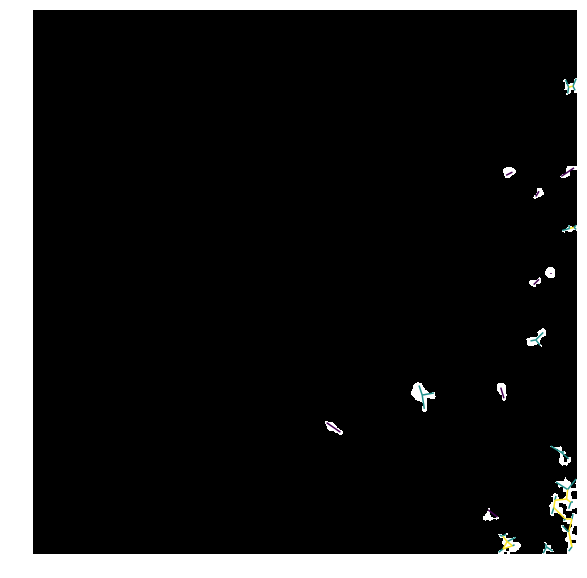

In [48]:
num = 13
if meanint[num] > 5.5:
    thresh = 2.5*meanint[num]
else:
    thresh = 50
print(meanint[num])
print(thresh)
if meanint[num] > 0.01:
    skeleton0, branch_data_short, nbranches, short_image, props = imp.skeleton_image('.', 'test_image_{}.tif'.format(num), threshold=thresh, show=True, disp_binary=True)
else:
    print('Low-intensity image')

In [ ]:
meanint

In [ ]:
sio.imshow(test_image[:, :, 2])